# Project 1, Part 2, Executive Questions: Customer Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: Stephanie Cabanela

Year: 2022

Semester: Spring

Section: 7


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Source for this cell: Lab 2

#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

# Connect to Postgres database
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# Create a cursor for the connection
cursor = connection.cursor()

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.


# 1.2.1 Total Number of Customers for all of AGM

In [3]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select count(*) as total_number_customers
from customers

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_number_customers
0,31082


# 1.2.2 Total Number of Customers by Store

Sort by store name in alphabetical order

In [4]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select st.city as store_name, count(distinct sa.customer_id) as total_number_customers
from stores as st
    join sales as sa on st.store_id = sa.store_id
group by store_name
order by store_name

"""

customers_by_store_df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
customers_by_store_df

,store_name,total_number_customers
0,Berkeley,8126
1,Dallas,6355
2,Miami,5720
3,Nashville,3640
4,Seattle,7206


# 1.2.3 Total Number of Customers by Distance from Store

Sort by shortest distance first

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select distance, count(customer_id) as total_number_customers
from customers
group by distance
order by distance

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,distance,total_number_customers
0,1,2790
1,2,1685
2,3,2417
3,4,2994
4,5,2426
5,6,2478
6,7,2107
7,8,2311
8,9,1906
9,10,1779


# 1.2.4 List of Customers who have signed up but not bought anything

Sort by customer last name, then first name

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select last_name, first_name
from customers as ct
left join sales as sa
    on ct.customer_id = sa.customer_id
where sa.customer_id is null
order by last_name, first_name

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,last_name,first_name
0,Agott,Tracy
1,Arnke,Daniella
2,Assandri,Hyacintha
3,Borman,Felice
4,Breit,Domini
5,Butterick,Jacenta
6,Camillo,Marysa
7,Dukelow,Lilas
8,Dukesbury,Corinna
9,Ellaway,Lorianna


# 1.2.5 What is the percentage of customers per population at the zip code level?

Sort by highest percentage first

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select z.zip, round((count(ct.customer_id) / z.population) * 100, 2) as percentage_customers_per_zip
from customers as ct
    join zip_codes as z on ct.zip = z.zip
group by z.zip
order by percentage_customers_per_zip desc

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,zip,percentage_customers_per_zip
0,98164,1.29
1,98050,1.09
2,33109,1.05
3,94613,1.05
4,37240,1.03
...,...,...
545,37075,0.00
546,75010,0.00
547,76018,0.00
548,94044,0.00


# 1.2.6 What is the percentage of customers per population at the city level?

Sort by highest percentage first

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cit.city, 
    cit.state, 
    round((count(ct.customer_id) / cit.population) * 100, 2) as percentage_customers_per_city
from customers as ct
    join cities as cit
    on (ct.city = cit.city and ct.state = cit.state)
group by cit.city, cit.state
order by percentage_customers_per_city desc

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,city,state,percentage_customers_per_city
0,Preston,WA,1.09
1,Indianola,WA,1.03
2,Stinson Beach,CA,1.02
3,Suquamish,WA,1.01
4,Medina,WA,1.01
...,...,...,...
193,Red Oak,TX,0.00
194,Wylie,TX,0.00
195,Allen,TX,0.00
196,Bedford,TX,0.00


# 1.2.7 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

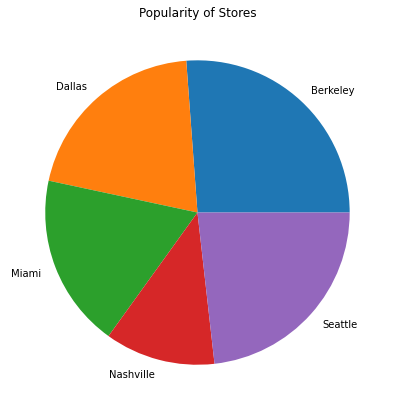

In [9]:
# What's interesting about this chart: We can divide our entire customer base and visually see which
# stores have more customers/are more popular.

plt.figure(figsize=(7,7))
plt.title('Popularity of Stores')
plt.pie(customers_by_store_df['total_number_customers'], labels=customers_by_store_df['store_name'])
plt.show()